In [1]:
%matplotlib inline
from __future__ import division
from imp import reload
import utils; reload(utils)
from utils import *
import matplotlib.pyplot as plt

In [2]:
#see https://www.kaggle.com/c/bike-sharing-demand
path = './data/train.csv'
test_path = './data/test.csv'

features, targets = read_linear_dataset(1000, 10)

#features, targets = read_dataset(path)
#features.head()

In [3]:
print features[0:5,]
print targets[0:5,]

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-00eabb546331>, line 1)

In [4]:
#normalize data
#norm_columns = ['season', 'holiday', 'workingday', 'weather','temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'dayofweek', 'month']
norm_columns = []
norm_means, norm_stds = normalize(features, norm_columns)

#features.head()

[]
[]


In [5]:
import numpy as np
# = features.as_matrix()
A = features
print(np.shape(A))
print(np.shape(targets))

#condition number
print("condition number = {0}".format(np.linalg.cond(A)))

(1000, 10)
(1000, 1)
condition number = 5.963877787783879


In [66]:
import optimizers.BaseOptimizer; reload(optimizers.BaseOptimizer)
import optimizers.NesterovOptimizer; reload(optimizers.NesterovOptimizer)
import optimizers.CoordinateDescent; reload(optimizers.CoordinateDescent)
import optimizers.StochasticGradientDescent; reload(optimizers.StochasticGradientDescent)
from optimizers.NesterovOptimizer import NesterovOptimizer
from optimizers.CoordinateDescent import CoordinateDescent
from optimizers.StochasticGradientDescent import StochasticGradientDescent

In [67]:
alpha = [0.8]
learning_rate = 1e-4
for ind, a in enumerate(alpha):
    opt = CoordinateDescent(A, targets, alpha=a, mu=0.5)

    losses, epochs = opt.optimize(100)
    print("finish for alpha = {0}".format(a))

terminated at step 60 because of x didnt change a lot, epoch = 60
finish for alpha = 0.8


[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.
  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.
  145.  146.  147.  148.  149.  150.  151.]
[40.548734264595765, 8.6832114620651346, 8.1545361074836844, 7.4170079690061721,

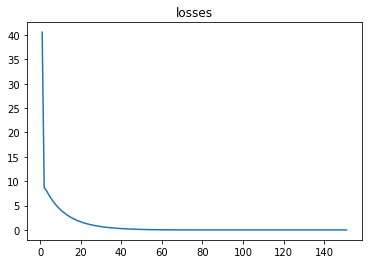

In [65]:
x_test = np.linspace(1, len(losses), len(losses))
print(x_test)
print(losses)
#plt.plot(x_test, losses_arr[0], x_test, losses_arr[1], x_test, losses_arr[2], x_test, losses_arr[3], x_test, losses_arr[4])
plt.plot(x_test, losses)
plt.title('losses')